# Project: Investigating Gapminder Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook, we will be exploring information provided by Gapminder, an organization that has provided a collection of everyday items in households throughout various income groups and across cultures. The team at Gapminder has also collected a large amount of information "about how people live their lives in different countries, tracked across the years, and on a number of different indicators"(Udacity description). 

For the purposes of this project, I have decided to investigate a few datasets in order to understand general trends within our global community. These datasets are GDP per capita, the mean life expectancy at birth, and the mean education level of a nation for both women and men between the ages of 15 and 24. In addition to these datasets, I have also included a dataset from the user "lukes" on Github, wherein we can find the regions that match to all the countries in the datasets from Gapminder. 

### Questions

Throughout this notebook, I would like to understand how the world has developed in all of these measures since 1970. I also plan on exploring the relationship between education levels of men and women and how they correlate with life expectancy and income. 

Therefore, my questions are: 
<ul>
<li> Has any region outperformed the others in terms of education, length of predicted life expectancy, and GDP? </li>
<li> Does the level of education predict GDP and length of predicted life expectancy?</li>
</ul>

To get started, we will import the Pandas, Numpy, Seaborn, and Matplotlib libraries.

In [40]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check it for cleanliness, and then trim and clean the datasets for analysis. 

### Load datasets

To begin, we must load in the datasets. The links for each of these datasets have been included if you would like to explore them in more detail.

In [41]:
# GDP per capita (constant PPP dollars), data found here: https://www.gapminder.org/data/documentation/gd001/
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

# Life expectancy at birth, data found here: https://www.gapminder.org/data/documentation/gd004/
life_expect = pd.read_csv('life_expectancy_years.csv') 

# Mean years in school for women between 15 and 24 years old, data found here: http://ghdx.healthdata.org/record/global-educational-attainment-1970-2015
w_school = pd.read_csv('mean_years_in_school_women_15_to_24_years.csv')

# Mean years in school for men between 15 and 24 years old, data found here: http://ghdx.healthdata.org/record/global-educational-attainment-1970-2015
m_school = pd.read_csv('mean_years_in_school_men_15_to_24_years.csv')

# Regions of the world from: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes
regions = pd.read_csv('all.csv')

### Check for cleanliness

#### Dataset columns

By looking at .head(), we can see how the dataset is generally structured and can determine what the dataset is capable of communicating. In these datasets, we can see that they range from either the years 1800 to 2040/2018 or from 1970 to 2015. These columns represent the value in a given year for each country. 

In [42]:
income.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940


In [43]:
life_expect.head(1)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7


In [44]:
w_school.head(1)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.48,0.5,0.51,0.53,0.55,0.57,0.59,0.61,0.63,...,1.6,1.66,1.71,1.77,1.82,1.88,1.94,2.0,2.07,2.13


In [45]:
m_school.head(1)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1.82,1.87,1.92,1.97,2.02,2.07,2.12,2.17,2.23,...,4.33,4.43,4.53,4.63,4.73,4.84,4.94,5.05,5.16,5.27


#### Searching for duplicates

We can search for duplicate values easily with .duplicated(). We can see that there are no duplicates in these datasets. 

In [46]:
# sum(life_expect.duplicated())
# sum(income.duplicated())
# sum(w_school.duplicated())
sum(m_school.duplicated()) #None of the datasets have duplicates

0

#### Information about the data

In order to see whether there are missing values in the dataset, we can look at the dataset info. Here we can see that none of these datasets are missing values, which means we will not have to fill any of these spots with averages.

In [47]:
# life_expect.info(1)
# income.info(1)
# w_school.info(1)
m_school.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 47 columns):
country    187 non-null object
1970       187 non-null float64
1971       187 non-null float64
1972       187 non-null float64
1973       187 non-null float64
1974       187 non-null float64
1975       187 non-null float64
1976       187 non-null float64
1977       187 non-null float64
1978       187 non-null float64
1979       187 non-null float64
1980       187 non-null float64
1981       187 non-null float64
1982       187 non-null float64
1983       187 non-null float64
1984       187 non-null float64
1985       187 non-null float64
1986       187 non-null float64
1987       187 non-null float64
1988       187 non-null float64
1989       187 non-null float64
1990       187 non-null float64
1991       187 non-null float64
1992       187 non-null float64
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64


### Cleaning the Datasets

Luckily, the datasets provided by Gapminder are already robust. There are no duplicates, and for the given years we can find no missing values. So for the cleaning, we can leave the education datasets aside, and we just have to drop a set of years for life expectancy and income. We will also clean up the regions dataset so we have only the relevant information that we will later use. 

#### Drop columns

In order to have a clean dataframe, we will remove all the years before 1970 and the years after 2015 for both the life expectancy and income datasets. We will do this because the education datasets both begin in 1970 and end in 2015. Rather than create new values based on the mean for those datasets, I believe it will be more than sufficient for us to narrow down our view in order to make conclusions. 

##### Life Expectancy 

In [48]:
# Remove all the years before 1970
life_expect.drop(life_expect.columns[1:171], axis=1, inplace=True)

In [49]:
# Remove all the years after 2015
life_expect.drop(life_expect.columns[47:], axis=1, inplace=True)

# Verify
life_expect.head(1)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,45.8,45.9,45.9,46.0,46.1,46.3,46.5,46.6,45.0,...,54.1,54.6,55.2,55.7,56.2,56.7,57.2,57.7,57.8,57.9


##### Income

In [50]:
# Remove all the years before 1970
income.drop(income.columns[1:171], axis=1, inplace=True)

In [51]:
# Remove all the years after 2015
income.drop(income.columns[47:], axis=1, inplace=True)

# Verify
income.head(1)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1180,1100,1050,1150,1180,1210,1240,1130,1190,...,1160,1290,1300,1530,1610,1660,1840,1810,1780,1750


##### Regions

For the regions dataset, we can go ahead and drop all columns beside the name of the country, as well as the region which we will later use.

In [52]:
# Remove columns between country and region 
regions.drop(regions.columns[1:5], axis=1, inplace=True)

In [53]:
# Remove columns after region
regions.drop(regions.columns[2:], axis=1, inplace=True)

# Verify
regions.head(1)

,name,region
0,Afghanistan,Asia


#### Change "years" from column titles to rows

Since it is difficult to read the dataset with years as columns, we will move the years into their own column, which is labelled as variable by default. This will make merging much easier in a moment.

We can find more information as to how to do the melt function here: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Pandas_Cheat_Sheet_2.pdf

In [54]:
life_expect1 = pd.melt(life_expect, 
        id_vars=["country"], 
        value_vars=['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980', '1981',
                    '1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993',
                    '1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005',
                    '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'],
        value_name="life_expectancy")

life_expect.head(1)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,45.8,45.9,45.9,46.0,46.1,46.3,46.5,46.6,45.0,...,54.1,54.6,55.2,55.7,56.2,56.7,57.2,57.7,57.8,57.9


In [55]:
income1 = pd.melt(income, 
        id_vars=["country"], 
        value_vars=['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980', '1981',
                    '1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993',
                    '1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005',
                    '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'],
        value_name="income")

income.head(1)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1180,1100,1050,1150,1180,1210,1240,1130,1190,...,1160,1290,1300,1530,1610,1660,1840,1810,1780,1750


In [56]:
w_school1 = pd.melt(w_school, 
        id_vars=["country"], 
        value_vars=['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980', '1981',
                    '1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993',
                    '1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005',
                    '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'],
        value_name="women_school")

w_school1.head(1)

,country,variable,women_school
0,Afghanistan,1970,0.48


In [57]:
m_school1 = pd.melt(m_school, 
        id_vars=["country"], 
        value_vars=['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980', '1981',
                    '1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993',
                    '1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005',
                    '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'],
        value_name="men_school")

m_school1.head(1)

,country,variable,men_school
0,Afghanistan,1970,1.82


#### Renaming Columns and Merging Datasets

Now that all the datasets are cleaned up and have more uniformity, we can easily merge them in and have the pertinent information from each dataset as a column in our new dataframe.

More information as to how to merge multiple datasets can be found here:  https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

In [58]:
df1 = w_school1.merge(m_school1,on=['country','variable']).merge(life_expect1,on=['country','variable']).merge(income1,on=['country','variable'])

df1.head(1)

,country,variable,women_school,men_school,life_expectancy,income
0,Afghanistan,1970,0.48,1.82,45.8,1180


Since "variable" does not communicate the information of the column, we will now change it to "year". We didn't do this earlier since we would have had to do it over and over again for each dataset. We can instead do it for all the datasets at once with our new dataframe.

In [59]:
df1 = df1.rename(index=str, columns = {"variable":"year"})

Similarly, we can rename the "name" column in the regions dataset to match our dataframe by renaming it to "country". 

In [60]:
regions = regions.rename(index=str, columns = {"name":"country"})

By renaming "name" to "country", we can now add the regions to our dataframe for simpler regional analyses. 

In [61]:
df = df1.merge(regions, on=['country'], how='inner')

### Clean Dataset

Now, we can finally see our cleaned dataset that allows us to search and compare values in a simpler manner.

In [62]:
df.head()

,country,year,women_school,men_school,life_expectancy,income,region
0,Afghanistan,1970,0.48,1.82,45.8,1180,Asia
1,Afghanistan,1971,0.50,1.87,45.9,1100,Asia
2,Afghanistan,1972,0.51,1.92,45.9,1050,Asia
3,Afghanistan,1973,0.53,1.97,46.0,1150,Asia
4,Afghanistan,1974,0.55,2.02,46.1,1180,Asia


<a id='eda'></a>
## Exploratory Data Analysis

In this section, I plan on answering these two questions:

<ul>
<li> <a href="#outperformed">Has any region outperformed the others in terms of education, length of predicted life expectancy, and GDP?</a>
<li> <a href="#education">Does the level of education predict GDP and length of predicted life expectancy?</a>
</ul>

<a id='outperformed'></a>
### Has any region outperformed the others in terms of education, length of predicted life expectancy, and GDP?

In this section, we will explore the performance of each region by looking at their means for each measure in 2015, as well as looking at the difference between 2015 and 1970. We will then wrap up by observing these measures over time.

First we can check which regions are present in the dataset.

In [63]:
df.region.value_counts()

Africa      2208
Asia        1794
Europe      1564
Americas    1334
Oceania      460
Name: region, dtype: int64

Now that we know Africa, Asia, Europe, Americas, and Oceania are the regions, we can compare and contrast them. To do so we can look at the GDP, life expectancy at birth, and education levels of women and men between the ages of 15 and 24. We can start out by seeing how they are each doing in 2015.

### 2015

In [64]:
df_15 = df.query('year =="2015"')

Means will be observed as the regions will be far more comparable in this way.

In [65]:
means_15 = df_15.groupby('region').mean()

In [66]:
means_15.head()

,women_school,men_school,life_expectancy,income
region,,,,
Africa,6.690833,7.343333,64.114583,5391.041667
Americas,11.608966,10.689310,75.210345,14635.517241
Asia,10.466667,10.504359,74.041026,21960.000000
Europe,12.958824,12.300000,79.226471,33846.176471
Oceania,11.629000,11.070000,68.480000,11106.000000


#### Measure's for each region's average
Since we have the means for each measure and region, we can compare them visually in a bar graph for each measure.

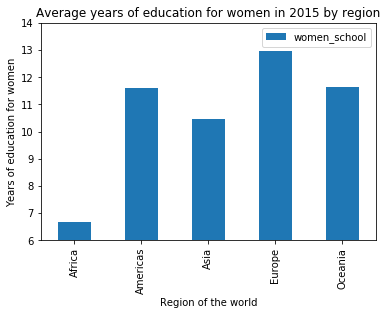

In [67]:
means_15.plot(y='women_school', kind='bar', title='Average years of education for women in 2015 by region')
plt.ylabel('Years of education for women')
plt.xlabel('Region of the world')
plt.ylim(6,14); 

For average years of education for women in 2015, we can see that Europe clearly shows the highest level of average education among women between 14 and 24 years of age.

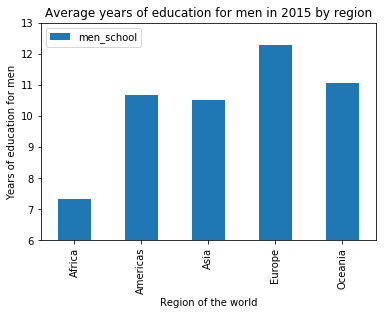

In [68]:
means_15.plot(y='men_school', kind='bar', title='Average years of education for men in 2015 by region')
plt.ylabel('Years of education for men')
plt.xlabel('Region of the world')
plt.ylim(6,13);

In a way that closely resemebles the outcome for women, the average years of education for men in 2015 shows that Europe has the highest level of average education among men between 14 and 24 years of age.

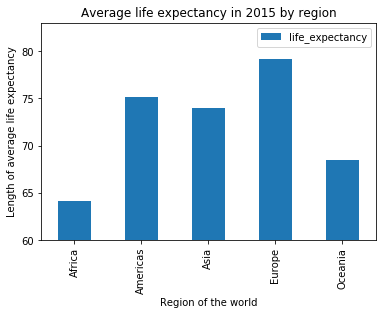

In [69]:
means_15.plot(y='life_expectancy', kind='bar', title='Average life expectancy in 2015 by region')
plt.ylabel('Length of average life expectancy')
plt.xlabel('Region of the world')
plt.ylim(60,83);

Once again, Europe has the highest result for life expectancy.

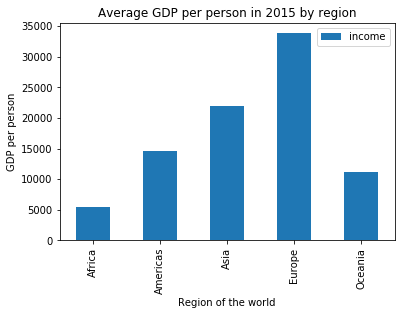

In [70]:
means_15.plot(y='income', kind='bar', title='Average GDP per person in 2015 by region')
plt.ylabel('GDP per person')
plt.xlabel('Region of the world');

As for the final measure in 2015, Europe manages to have a massive margin in comparison to the other regions in terms of average GDP.

### 1970

Since "best" is subjective, we should check to see where these regions were at the beginning of our dataset. Here, we can look at how much each region's average has improved since 1970.

In [71]:
df_70 = df.query('year =="1970"')

In [72]:
means_70 = df_70.groupby('region').mean()

In [73]:
means_15.head()

,women_school,men_school,life_expectancy,income
region,,,,
Africa,6.690833,7.343333,64.114583,5391.041667
Americas,11.608966,10.689310,75.210345,14635.517241
Asia,10.466667,10.504359,74.041026,21960.000000
Europe,12.958824,12.300000,79.226471,33846.176471
Oceania,11.629000,11.070000,68.480000,11106.000000


We can subtract the averages of the regions on each measure in 1970 from the averages in 2015.

In [74]:
means_diff = means_15 - means_70

In [75]:
means_diff.head()

,women_school,men_school,life_expectancy,income
region,,,,
Africa,4.577500,4.404167,12.693750,1629.083333
Americas,6.362759,5.409655,11.527586,7685.862069
Asia,6.147949,5.355897,15.684615,9154.076923
Europe,6.365000,5.359706,8.358824,19266.470588
Oceania,6.086000,5.069000,6.570000,5141.000000


#### Measure's for each region's average

To once again help us visualize the difference, we can look at bar graphs that depict the difference.

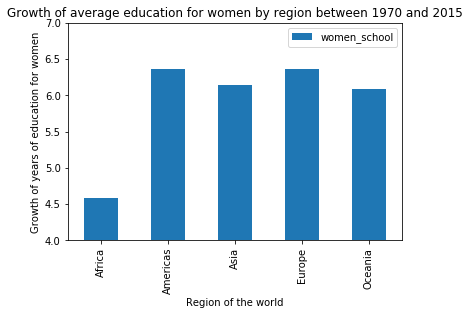

In [76]:
means_diff.plot(y='women_school', kind='bar', title='Growth of average education for women by region between 1970 and 2015')
plt.ylabel('Growth of years of education for women')
plt.xlabel('Region of the world')
plt.ylim(4,7);

Unfortunately, the difference is so close here that the difference is barely visible. Nevertheless, we know from the numbers that Europe has grown the most of all the regions when considering average years of education for women between 15 and 24.

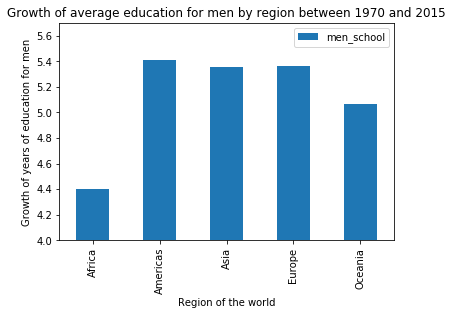

In [116]:
means_diff.plot(y='men_school', kind='bar', title='Growth of average education for men by region between 1970 and 2015')
plt.ylabel('Growth of years of education for men')
plt.xlabel('Region of the world')
plt.ylim(4,5.7);

For the first time we can see that, although by a small margin, that Europe is no longer the region that improved the most. Rather the Americas' average difference between 1970 and 2015 is greatest in terms of average education for men between 15 and 24.

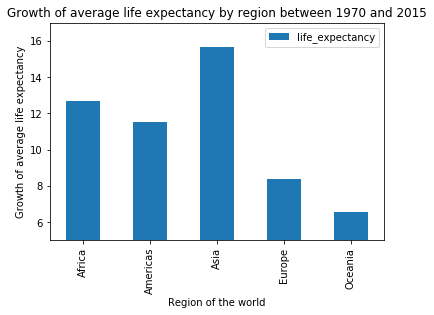

In [114]:
means_diff.plot(y='life_expectancy', kind='bar', title='Growth of average life expectancy by region between 1970 and 2015')
plt.ylabel('Growth of average life expectancy')
plt.xlabel('Region of the world')
plt.ylim(5,17);

In terms of growing life expectancy, we can see that Asia has improved dramatically when compared to the other regions since 1970.

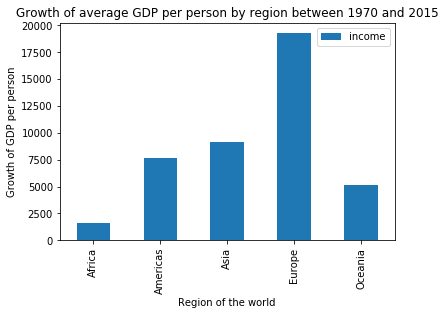

In [113]:
means_diff.plot(y='income', kind='bar', title='Growth of average GDP per person by region between 1970 and 2015')
plt.ylabel('Growth of GDP per person')
plt.xlabel('Region of the world');

Last but not least, we can see that the growth of the average GDP between 1970 and 2015 was substantial for Europe. Europe has grown more than twice as quickly as the Asia in terms of average GDP per person.

<a id='growth'></a>
### Growth of measures over time

Finally, to gain a general perspective of each nation within this comparison, I'd like for us to look at each nation over time.

In order to observe these measures over time, I believe it would be best for us to chunk off the years to improve the readability of the results, as we will see all the countries over the years on one graph. To do this, we will place the years in bins with 5 year intervals. 

In [80]:
bin_edges = [ 1969, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015] 

In [81]:
bin_names = [ "1975", "1980", "1985", "1990", "1995", "2000", "2005", "2010", "2015"]

Now we can split our years into 5 year intervals. However, the years in our dataframe appear as strings, so we first have to change our years to intergers.

In [82]:
df["year_num"] = df["year"].astype("int")

In [83]:
df['group_years'] = pd.cut(df['year_num'], bin_edges, labels=bin_names)

We can finally see how our measures have done over time around the world.

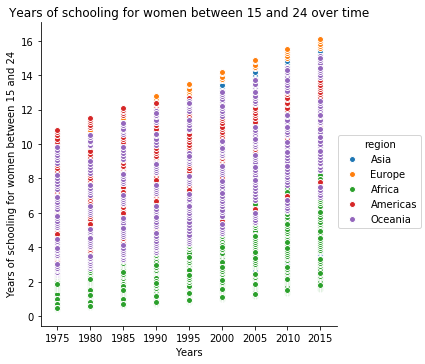

In [125]:
sns.pairplot(x_vars=["group_years"], y_vars=["women_school"], data=df, hue='region', size=5)
plt.ylabel('Years of schooling for women between 15 and 24')
plt.xlabel('Years')
plt.title('Years of schooling for women between 15 and 24 over time');

We can see that each country grew between 1970 and 2015 in terms of years of education for women between 15 and 24. 

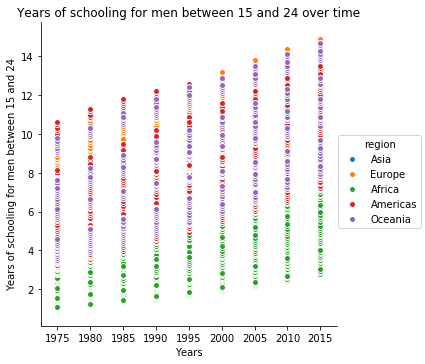

In [126]:
sns.pairplot(x_vars=["group_years"], y_vars=["men_school"], data=df, hue='region', size=5)
plt.ylabel('Years of schooling for men between 15 and 24')
plt.xlabel('Years')
plt.title('Years of schooling for men between 15 and 24 over time');

Likewise, we can see that each country grew between 1970 and 2015 in terms of years of education for men between 15 and 24. 

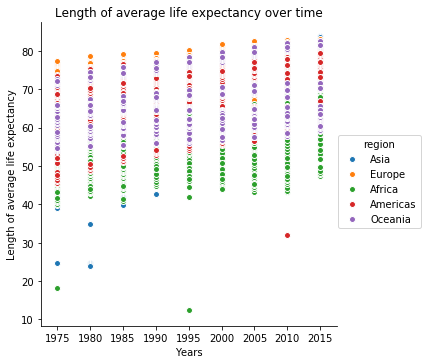

In [127]:
sns.pairplot(x_vars=["group_years"], y_vars=["life_expectancy"], data=df, hue='region', size=5)
plt.ylabel('Length of average life expectancy')
plt.xlabel('Years')
plt.title('Length of average life expectancy over time');

The growth is not as unified for life expectancy, and of course, there are outliers with this case since wars, famines, and natural disasters do happen, and these events substantially drop the life expectancy of a nation. Nevertheless, we can see the whole world steadily increasing.

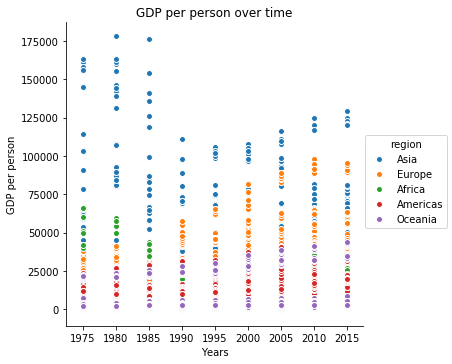

In [128]:
sns.pairplot(x_vars=["group_years"], y_vars=["income"], data=df, hue='region', size=5)
plt.ylabel('GDP per person')
plt.xlabel('Years')
plt.title('GDP per person over time');

And finally, we can see that GDP per person does not show the same gradual growth as the other measures. Here we can see that Asia was sporadically wealthy between 1970 and 1985, but then it joined the rest of the countries in a gradual upward slope.

<a id='education'></a>
### Does the level of education predict GDP and length of predicted life expectancy?

In this section, we will simply look at the correlations between measures for each country in 2015, as well as 1970 to see if the trend has been consistent over time.

### 2015

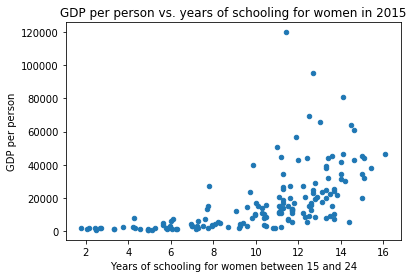

In [105]:
df_15.plot(x='women_school', y='income', kind='scatter', title='GDP per person vs. years of schooling for women in 2015')
plt.ylabel('GDP per person')
plt.xlabel('Years of schooling for women between 15 and 24'); 

Here we can see that up until 8 years of education for women between 15 and 24, the relationship between income and education is not very visible. However, after the 8 year mark the relationship begins to form a weak positive slope. This seems to point at there being a relationship of some sort between income and higher levels of education for women between 15 and 24.

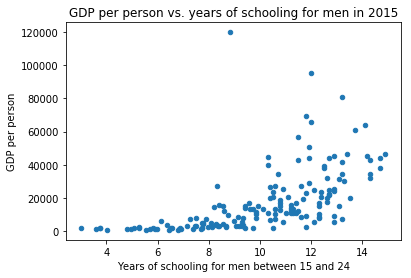

In [104]:
df_15.plot(x='men_school', y='income', kind='scatter', title='GDP per person vs. years of schooling for men in 2015')
plt.ylabel('GDP per person')
plt.xlabel('Years of schooling for men between 15 and 24');

The same can be said of relationship between income and years of education for men between 15 and 24. At the 8 years of education mark, one can see the beginning of the weak positive slope, which indicates a relationship of some sort between income and years of education for men between 15 and 24.

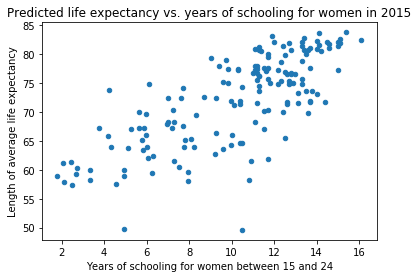

In [103]:
df_15.plot(x='women_school', y='life_expectancy', kind='scatter', title='Predicted life expectancy vs. years of schooling for women in 2015')
plt.ylabel('Length of average life expectancy')
plt.xlabel('Years of schooling for women between 15 and 24');

We can see here that life expectancy has a much more prominent positive slope when compared with years of schooling for women between 15 and 24. This indicates that there appears to be a weak positive correlation between these two measures and that women's level of schooling can predict the predicted life expectancy.

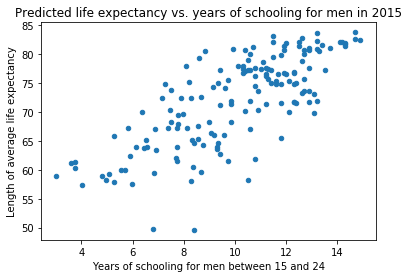

In [102]:
df_15.plot(x='men_school', y='life_expectancy', kind='scatter', title='Predicted life expectancy vs. years of schooling for men in 2015')
plt.ylabel('Length of average life expectancy')
plt.xlabel('Years of schooling for men between 15 and 24');

In line with the findings for women, the level of education for men between 15 and 24 shows a positive relationship of some sort with life expectancy. We can see this with the graph's depiction of a weak positive correlation.

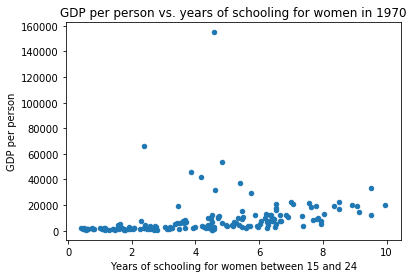

In [101]:
df_70.plot(x='women_school', y='income', kind='scatter', title='GDP per person vs. years of schooling for women in 1970')
plt.ylabel('GDP per person')
plt.xlabel('Years of schooling for women between 15 and 24');

Now, when we look at the relationship between the level of education reached for women between 15 and 24 in 1970 and GDP per person, we can no longer come to the same conclusion we could in 2015. The outcome is too weak to come to any correlational conclusions.

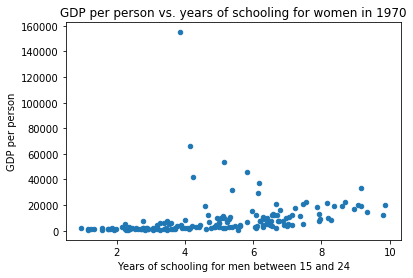

In [100]:
df_70.plot(x='men_school', y='income', kind='scatter', title='GDP per person vs. years of schooling for women in 1970')
plt.ylabel('GDP per person')
plt.xlabel('Years of schooling for men between 15 and 24');

As ususal, the same that is said for women's education applies to men's education. We can see that the GDP does not have a visible correlation with GDP per person as the results are far too sporatic.

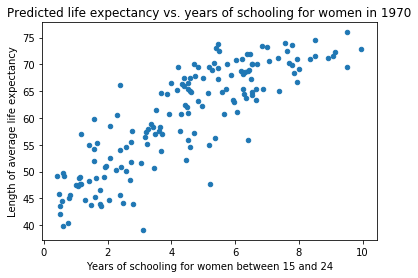

In [98]:
df_70.plot(x='women_school', y='life_expectancy', kind='scatter', title='Predicted life expectancy vs. years of schooling for women in 1970')
plt.ylabel('Length of average life expectancy')
plt.xlabel('Years of schooling for women between 15 and 24');

Here we can see a prominant result. The correlation is visibly positive, albeit still weak. The positive slope shows that there might be a relationship of some sort between life expectancy and the level of education of women between 15 and 24 in a country.

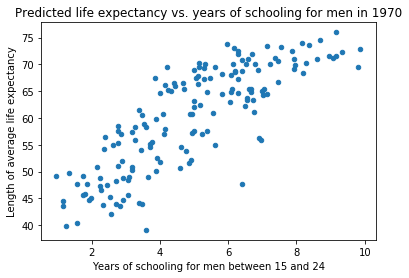

In [99]:
df_70.plot(x='men_school', y='life_expectancy', kind='scatter', title='Predicted life expectancy vs. years of schooling for men in 1970')
plt.ylabel('Length of average life expectancy')
plt.xlabel('Years of schooling for men between 15 and 24');

Last but not least, we can see another weak positive correlation, as is demonstrated by this positive slope. It shows that the level of education of men between 15 and 24 can predict the predicted life expectancy.

<a id='conclusions'></a>
## Conclusions

Overall, the each measure I have chosen appear to have upward growth if we consider the <a href="#growth">growth of the measures over time</a>. As for the questions that I had asked, I believe we have come to a rudimentary, yet unified answer for both. 

<a href="#outperformed">Has any region outperformed the others in terms of education, length of predicted life expectancy, and GDP?</a>

When looking at the graphs, we can definitely place Europe as the region that outperforms the others in terms of education, length of predicted life expectency, and GDP. 

In 2015, the measures displaying the means of each region clearly show that Europe performed best all around. You can find a higher average education level for men and women, a longer predicted life expectancy, and a higher GDP per person within Europe when compared to the averages of the other regions. 

However, when looking at the difference between the means for each measure between 1970 and 2015, we can see that Asia, the Americas and Europe are nearly tied for two of the comparisons. Europe held the highest average for length of time that women spend in school, and the Americas managed to have the higher average for length of time that men spent in school. As for the growth in predicted life expectancy, Asia undoubtably outgrew all regions. And for the final measure, Europe managed to outgrow all the other regions by a large amount when considering the average GDP per person.

In summary, all the regions have grown between 1970 and 2015 on all of these measures, but if we were to chose a region that outperformed the rest, my opinion would be Europe. However, a notable limitation of determining which region outgrew the rest is that there are ways of analysing this information that I am not yet aware of. It is possible that if I consider the percentage of growth, or if I would break down the regions into smaller chunks, then I might have come to a completely different result. 

If I were to continue this research I would like to observe specific countries that are similar in nature from each region in order to have a more granular understanding of the measures. 

<a href="#education">Does the level of education predict GDP and length of predicted life expectancy?</a>

When considering the levels of education for both men and women between the ages of 15 and 24 in 2015, we can see that it is consistently able to predict, albeit weakly, the GDP per person and life expectancy. However, if we look at 1970, this relationship between education and GDP per person was not yet developed. As always, we cannot infer causality based upon an apparent correlation, but it is nevertheless clear that higher levels of education have developed a positive relationship with GDP and life expectancy. 

However, this question is limited by the fact that one cannot confidently infer a relationship when the correlation is as weak as it is. All the scatterplots that answer this question are unable to show a strong correlation and as a result, I cannot confidently say that education levels predict GDP and life expectancy. So for this question, I can only give a soft "yes" as an answer. 

In [96]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0